In [1]:
import os
import pandas as pd
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Definir la ruta de la carpeta que contiene las imágenes
ruta_c = 'C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\BD\\BD_Hat\\All'
#ruta_train = "C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\BD\\BD_Hat\\train"
#ruta_test = "C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\BD\\BD_Hat\\test"



Recorremos toda la carpeta y hacemos una matriz con todos los datos de todas las imagenes

In [2]:
# Crear una lista para almacenar los datos de las imágenes
def obtener_imagen_etiqueta(ruta_carpeta):
    directorio = {'Imagen': [], 'Etiqueta': []}
    # Recorrer la carpeta para buscar archivos jpg
    for carpeta_nombre in os.listdir(ruta_carpeta):
        carpeta_ruta = os.path.join(ruta_carpeta, carpeta_nombre)
        if os.path.isdir(carpeta_ruta):
            for archivo_nombre in os.listdir(carpeta_ruta):
                try:
                    archivo_ruta = os.path.join(carpeta_ruta, archivo_nombre)
                    
                    # Cargar la imagen utilizando PIL (Pillow)
                    imagen = face_recognition.load_image_file(archivo_ruta)
                    
                    # Redimensionar la imagen a 150x150
                    imagen_redimensionada = np.array(Image.fromarray(imagen).resize((224, 224)))

                    directorio['Imagen'].append(imagen_redimensionada)
                    directorio['Etiqueta'].append(carpeta_nombre)
                    
                except Exception as e:
                    print("Error en archivo:"+str(archivo_nombre)+":"+str(e))
    print("Proceso terminado")
    return directorio

data = obtener_imagen_etiqueta(ruta_c)


Proceso terminado


Transformamos los datos a un pandas

In [3]:
columnas = ['Imagen','Etiqueta']
df = pd.DataFrame(data, columns=columnas)


In [4]:
df.head()


,Imagen,Etiqueta
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ASCOT CAP
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ASCOT CAP
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ASCOT CAP
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ASCOT CAP
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ASCOT CAP


In [5]:
print(df.shape)

(3720, 2)


Conversion a JSON. Es muy pesado, por lo que pasamos de ello.

In [6]:
#df_imagenes_recortadas.to_json('test.csv')

In [7]:
#df_jason = pd.read_json('test.csv')
#df_jason.head()

Pickle es una buena opción. Este se usa para serializar objetos en Python. Lamentablemente su uso está únicamente destinado a Python

In [8]:
#df_imagenes_recortadas.to_pickle('test.pkl')

In [9]:
#df_pickle = pd.read_pickle('test.pkl')
#df_pickle.head()

HDF5 es una gran opción. Se usa para el manejo de datos y pueden utilizarlo otros lenguajes o programas como MATLAB y Java. Está destinado para manejo de grandes datos.

Instalar tables para usar hdf5

In [10]:
#pip install tables

In [6]:
df.to_hdf('DB_Hats_2.h5', key='dataframe', mode='w')


C:\Users\Waldosir\AppData\Local\Temp\ipykernel_9916\2500568818.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Etiqueta'], dtype='object')]

  df.to_hdf('DB_Hats_2.h5', key='dataframe', mode='w')


Leer el archivo creado

In [7]:
df_HDF = pd.read_hdf('DB_Hats_2.h5')


In [8]:
df_HDF.head()

,Imagen,Etiqueta
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ASCOT CAP
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ASCOT CAP
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ASCOT CAP
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ASCOT CAP
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ASCOT CAP


Nuevamente visualizamos los datos para ver que si esten correctamente

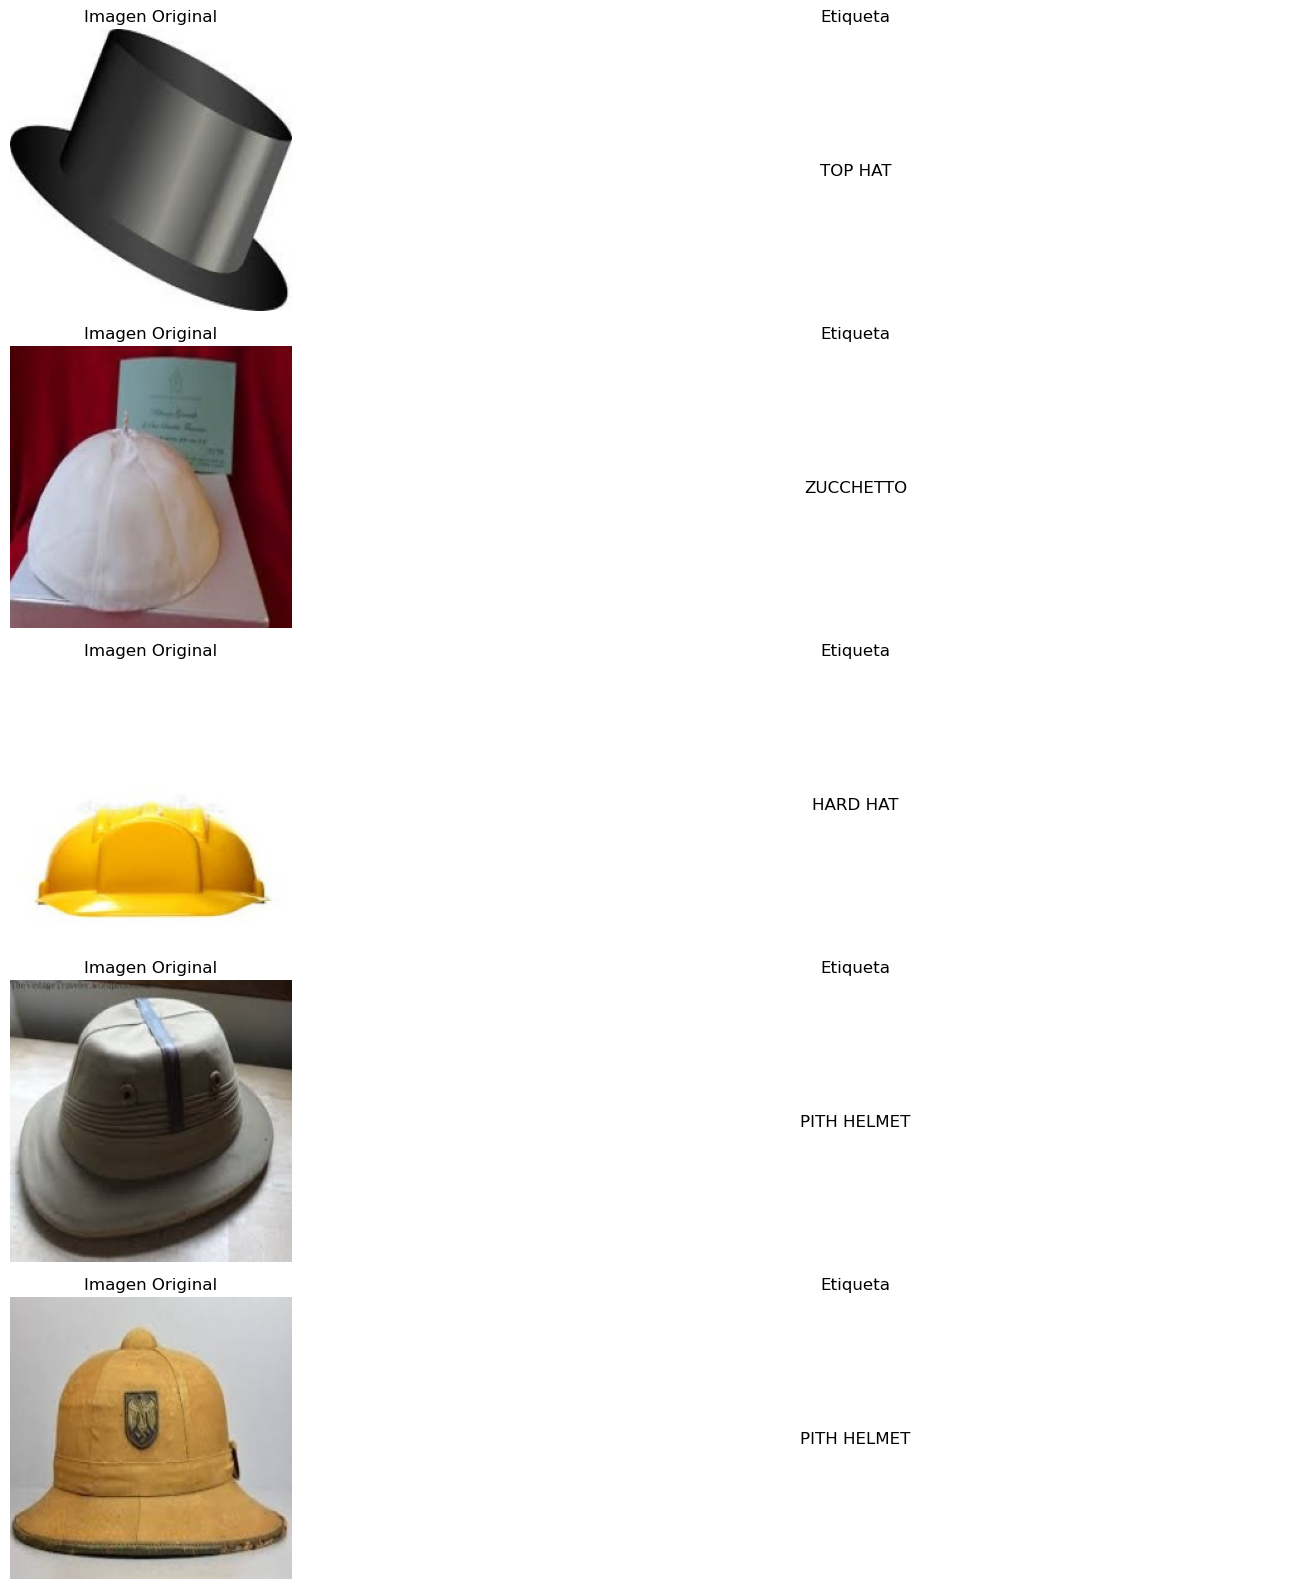

In [9]:
df_ejemploHDF = df_HDF.sample(n=5)

# Visualizar las imágenes seleccionadas con los rostros detectados y los landmarks faciales
fig, axes = plt.subplots(nrows=len(df_ejemploHDF), ncols=2, figsize=(16, 16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    # Subgráfico para la imagen original
    ax0 = axes[i, 0]
    ax0.imshow(row['Imagen'])
    ax0.set_title("Imagen Original")
    ax0.axis('off')
    

    
    # Subgráfico para la emoción (si está disponible)
    ax3 = axes[i, 1]
    # Aquí puedes agregar código para mostrar la emoción en lugar de un gráfico vacío
    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment='center', verticalalignment='center', fontsize=12)
    ax3.set_title("Etiqueta")
    ax3.axis('off')

plt.tight_layout()
plt.show()